<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from sklearn import datasets

iris = datasets.load_iris()

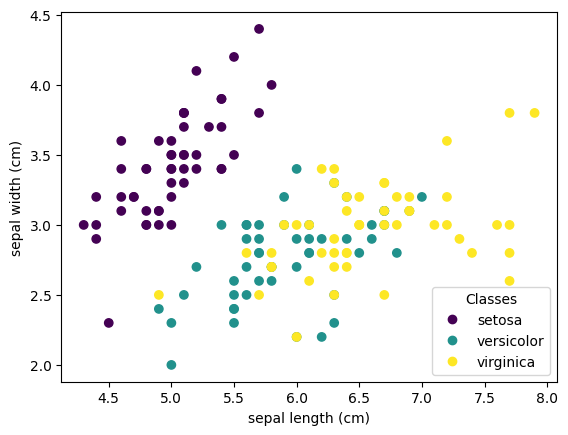

In [89]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

##【問題1】データの取得

In [90]:
import pandas as pd
from sklearn.datasets import load_iris

# irisデータセットをロード
iris = load_iris()

X = {
    'sepal_length': iris.data[:, 0],
    'sepal_width': iris.data[:, 1],
    'petal_length': iris.data[:, 2],
    'petal_width': iris.data[:, 3]
}

# DataFrameに変換
X = pd.DataFrame(X)

# DataFrameを表示
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [91]:
y = {'Species': iris.target}
y = pd.DataFrame(y)
print(y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


##【問題2】データの結合

In [92]:
df = pd.concat([X, y], axis=1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


##【問題3】データの確認

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

In [27]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


ラベルごとのサンプル数の合計を出力する。

In [32]:
sum_slength = df['sepal_length'].count()
print(sum_slength)

150


In [33]:
sum_swidth = df['sepal_width'].count()
print(sum_swidth)

150


In [34]:
sum_plength = df['petal_length'].count()
print(sum_plength)

150


In [35]:
sum_pwidth = df['petal_width'].count()
print(sum_pwidth)

150


In [28]:
sum_df = df.groupby('Species').count()
print(sum_df)

         sepal_length  sepal_width  petal_length  petal_width
Species                                                      
0                  50           50            50           50
1                  50           50            50           50
2                  50           50            50           50


特徴量に欠損値があるかを確認する。

In [93]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64


特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [94]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width     Species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


##【問題4】irisデータセット自体の調査

###「フィッシャーのアヤメ」
機械学習やデータ分析の世界で有名なデータセット。
カナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータ。

###Iris setosa
アラスカ、メイン州、カナダ（ブリティッシュコロンビア州、ニューファンドランド州、ケベック州、ユーコン州を含む）、ロシア（シベリアを含む）、アジア北東部、中国、韓国、そして南は日本まで、北極海全域に分布する根茎性の 多年草である。

###Iris versicolor
北米原産のアイリスの一種で、アメリカ東部と カナダ東部に自生。スゲの生い茂る草地や湿地、川岸や岸辺に普通に見られる。

###Iris virginica
北アメリカ中東部原産のアヤメ科アヤメ属の多年草 である。
エドガー・アンダーソンによって別種として同定され、ロナルド・フィッシャーが1936年の論文「分類学的問題における複数測定の使用」で線形判別分析の一例として用いた。



###データセットとしての特徴
1936年にロナルド・フィッシャーによって発表

####測定項目
がく片の長さ (Sepal Length)
がく片の幅 (Sepal Width)
花弁の長さ (Petal Length)
花弁の幅 (Petal Width)


####重要性
パターン認識や機械学習の入門教材として広く使用
分類問題の典型例として知られる
データの視覚化や統計分析の実践に適している


####特徴
セトサ種は他の2種と比較的簡単に区別できる
バーシコロルとバージニカは一部特徴が重なり、完全な線形分離は難しい

##【問題5】必要なデータを抽出

sepal_widthの列を2つの異なる方法で抽出する

In [95]:
# .locを使った場合
df.loc[:, 'sepal_width']

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [96]:
# .ilocを使った場合
df.iloc[:, 1]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


.locは、行や列のラベル名（インデックス・列名）を指定し、条件式でデータを抽出している。明示的にラベルを指定するので、データがどの位置にあっても正確に抽出可能である。
（なお、スライスでは、指定した範囲の最後の値も含まれるそう）

それに対して.ilocでは、行番号や列番号でデータを抽出するので、ラベル名が分からない場合や、番号で直接指定したい場合に便利。行や列の「何番目か」を0ベースのインデックスで指定する。
ラベルに依存しないため、柔軟に使える。
（なお、スライスでは、指定した範囲の最後の値は含まれないそう）。

畢竟、データをラベル名や条件でフィルタリングしたい場合には.locを、データの位置（行番号や列番号）で抽出したい場合は.ilocを使うと良いとみられる。


50番目から99番目までのデータを抽出する

In [97]:
df.iloc[50:100,:]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


petal_lengthの列の50番目から99番目までのデータを抽出する

In [98]:
df.iloc[50:100, 2]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


petal_widthの値が0.2のデータを抽出する

In [99]:
df.loc[df['petal_width'] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


##【問題6】図の作成

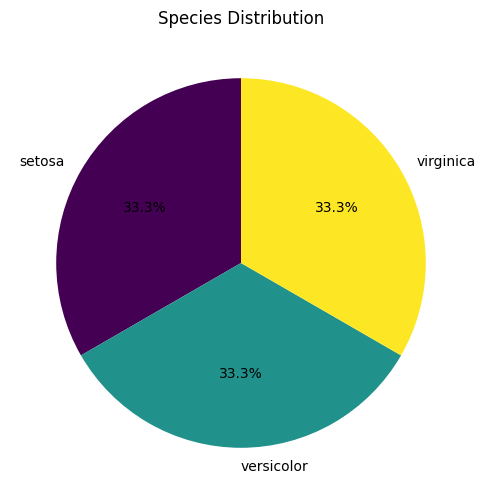

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

species_counts = df['Species'].value_counts()

# Convert index to string type
species_counts.index = species_counts.index.astype(str)

label_mapping = {'0': 'setosa', '1': 'versicolor', '2': 'virginica'}
# Now, 'label' will be a string and match the keys in 'label_mapping'
new_labels = [label_mapping[label] for label in species_counts.index]

# 円グラフを描画
plt.figure(figsize=(6, 6))
species_counts.plot(
    kind='pie',
    labels=new_labels,
    autopct='%1.1f%%',
    startangle=90,
    colormap='viridis'
)
plt.title('Species Distribution')
plt.ylabel('')  # 不要なy軸ラベルを消す
plt.show()

特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化

<function matplotlib.pyplot.show(close=None, block=None)>

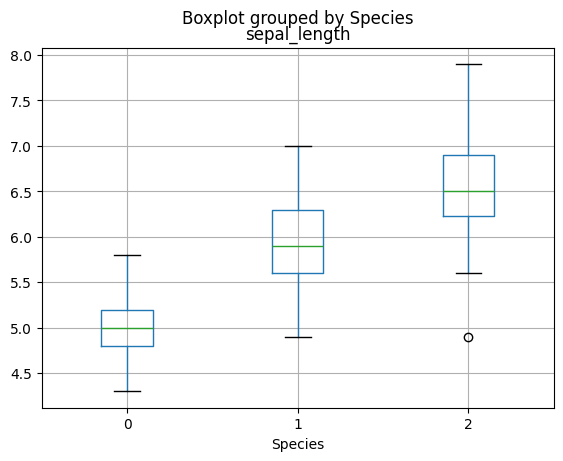

In [101]:
#sepal_lengthの、箱ひげ図を用いたラベルごとのデータ分布
df.boxplot(column='sepal_length', by='Species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

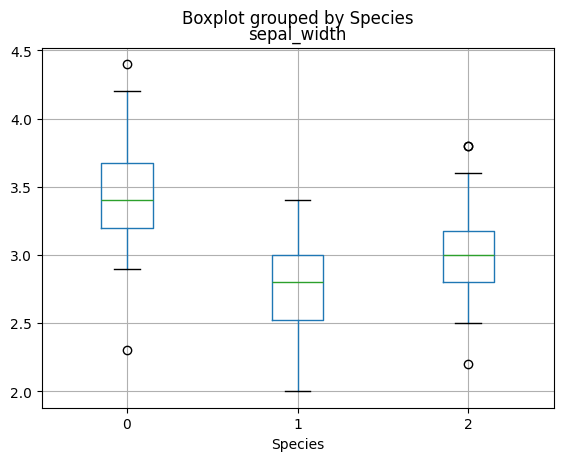

In [102]:
#sepal_widthの、箱ひげ図を用いたラベルごとのデータ分布
df.boxplot(column='sepal_width', by='Species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

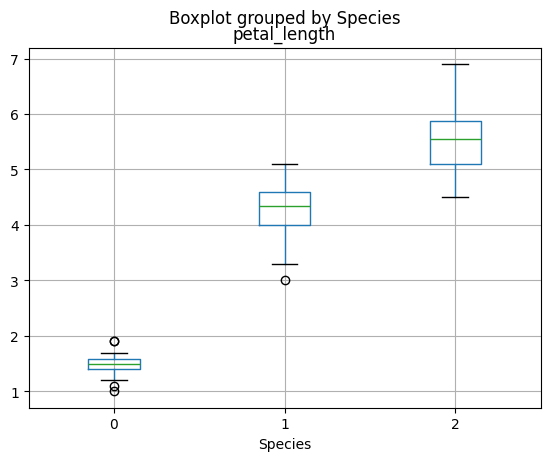

In [103]:
#petal_lengthの、箱ひげ図を用いたラベルごとのデータ分布
df.boxplot(column='petal_length', by='Species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

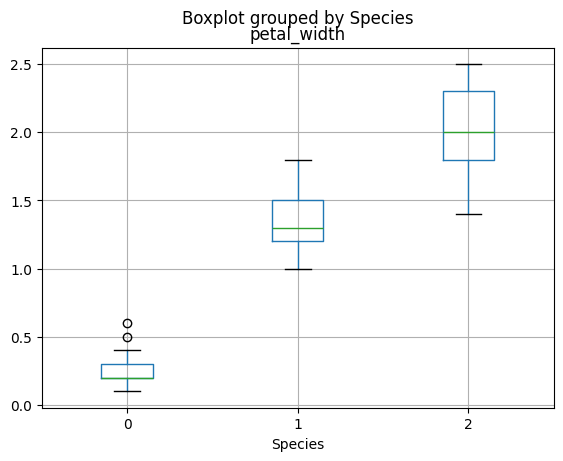

In [81]:
#petal_widthの、箱ひげ図を用いたラベルごとのデータ分布
df.boxplot(column='petal_width', by='Species')
plt.show

特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化

In [83]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

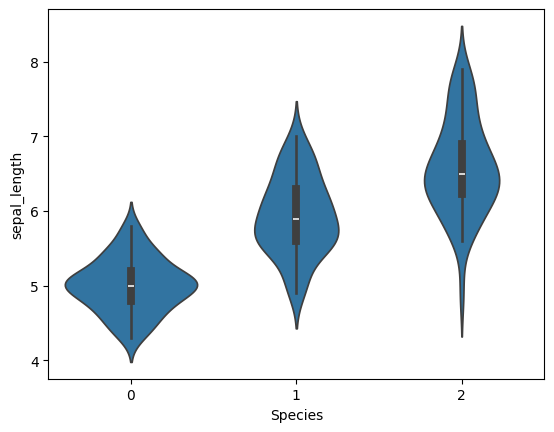

In [87]:
#sepal_lengthの、バイオリン図を用いたラベルごとのデータ分布
sns.violinplot(x='Species', y='sepal_length', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

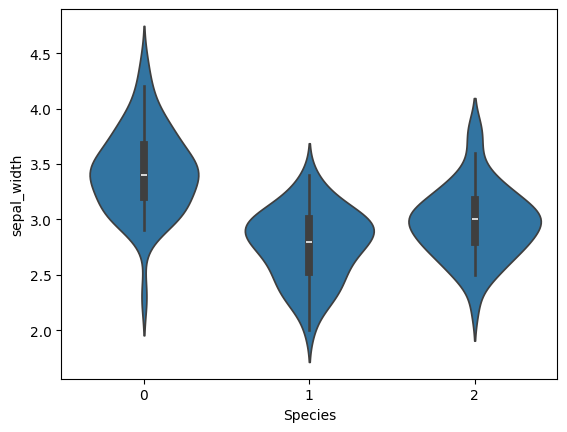

In [86]:
#sepal_widthの、バイオリン図を用いたラベルごとのデータ分布
sns.violinplot(x='Species', y='sepal_width', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

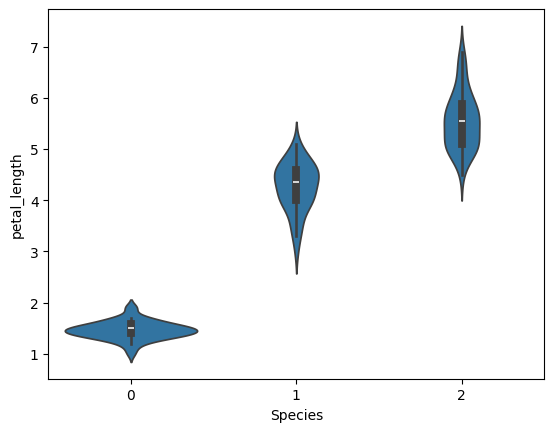

In [85]:
#petal_lengthの、バイオリン図を用いたラベルごとのデータ分布
sns.violinplot(x='Species', y='petal_length', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

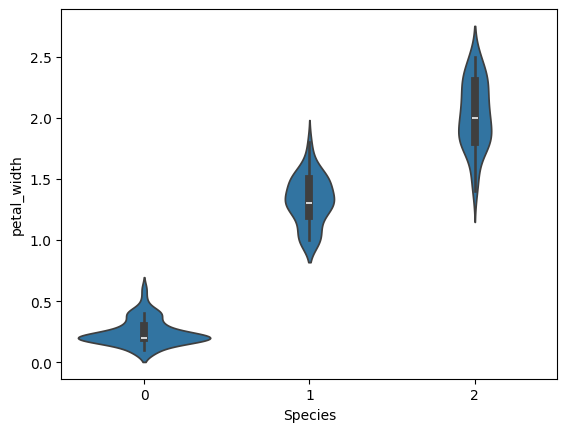

In [84]:
#petal_widthの、バイオリン図を用いたラベルごとのデータ分布
sns.violinplot(x='Species', y='petal_width', data=df)
plt.show

###箱ひげ図の特徴
データの5つの要約統計量を表示
・最小値
・第1四分位数（25パーセンタイル）
・中央値（50パーセンタイル）
・第3四分位数（75パーセンタイル）
・最大値
＊外れ値を個別の点で表示

利点：
・データの分布を簡潔に表現
・異常値の検出が容易
・複数のグループを比較しやすい
・理解が直感的

###バイオリン図の特徴
・カーネル密度推定を使用して確率密度を表示
・箱ひげ図の情報に加えて、データの分布形状も表現
・両側対称の形状で密度を表現（バイオリンの形状に似ている）

利点：
・データの分布の形状が視覚的に分かる
・双峰性などの複雑な分布パターンを発見できる
・データの集中している部分が一目瞭然

##【問題7】特徴量間の関係の確認

すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。

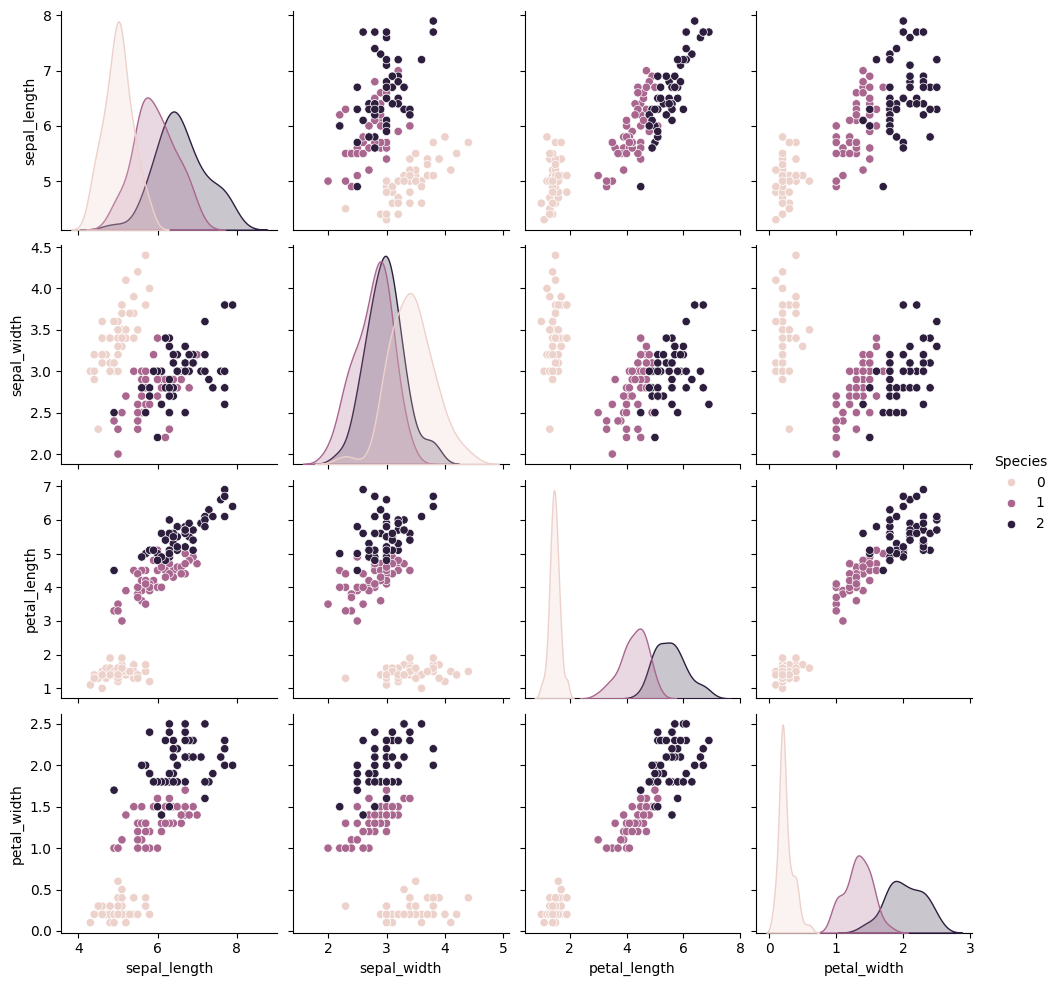

In [104]:
sns.pairplot(df, hue='Species')
plt.show()

４つの特徴量に関する相関係数行

In [105]:
# 相関係数行列を作成
correlation_matrix = X.corr()

correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


相関係数行列のヒートマップ

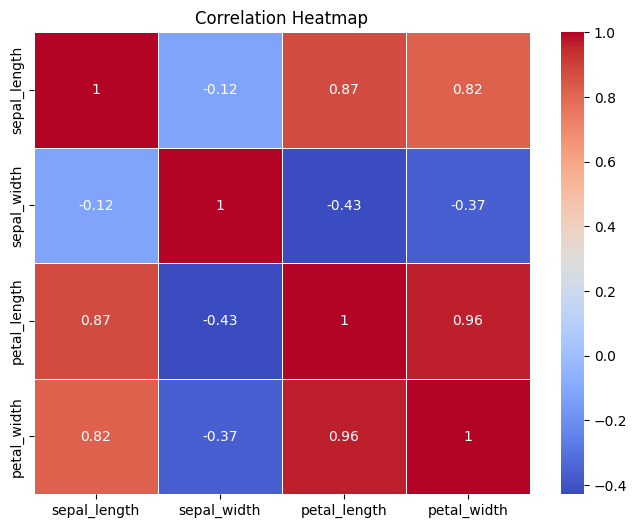

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##【問題8】可視化したグラフや表の結果の説明】

###ex. 散布図行列を見て
Setosaのデータは他2つのVirgicolor・Virginicaのデータが近くに集中しているのに対して、全体的に範囲が被らず大きく異なることが分かる。
また、がく片の幅（Sepal Width）の関係する散布図は、他の特徴量と比べて散布図の形が1つだけ、全体的に広がっており、特徴的である。3種とも似たような範囲に分布しており、種の判別には単独では使いにくい特徴だと考えられる。逆に、花弁の長さ（Petal Length）はSetosaが明確に短く、versicolorとvirginicaには若干の重なりがあるのみで、判別に有効だと考えられる。

実際に相関係数の行列のヒートマップを確認しても、がく片の長さと、花弁の長さ・幅は互いに0.8以上の大きな相関がある中、がく片の幅は負の相関がある。花弁の長さとの相関係数の絶対値は総じて大きい。